In [7]:
import sys
import pathlib as pl
import time
import numpy as np
repo_dir  =r'C:\Users\MasterGnome\Documents\01-WISC\Research\Code\AMDC_base'
repo_dir  = pl.Path(repo_dir )
scripts_folder = repo_dir  / 'AMDC-Firmware' / 'scripts'  
sys.path.append(str(scripts_folder))

from AMDC import AMDC
from AMDC_Logger import AMDC_Logger, find_mapfile

In [8]:
amdc = AMDC(port = 'COM6')  
amdc.connect() #opens up serial communication
#amdc.cmd("inv vdc t1 {}".format(Vdc))
amdc.cmd("currReg enc")

TypeError: __init__() got an unexpected keyword argument 'port'

In [9]:
# Cretae AMDC Logger Object
mapfile_path = find_mapfile(repo_dir)
logger = AMDC_Logger(AMDC = amdc, mapfile = mapfile_path)

# SET THIS TO PATH OF YOUR USER APPLICATION CODE
user_app_c_code_path = r'C:\Users\MasterGnome\Documents\01-WISC\Research\Code\AMDC_base\AMDC-Private\usr\currReg'                          

NameError: name 'amdc' is not defined

In [4]:
logger.sync()

NameError: name 'logger' is not defined

In [ ]:
logger.clear_all()
logger.sync()

#logger.auto_register(user_app_c_code_path)
#logger.register('Theta_e')
logger.register('instSpeed filtWm theta_mech Iq WmC', samples_per_sec = 2500,)
#logger.register('IqCom IqAct IdCom IdAct', samples_per_sec = 10000, var_type = 'double')
# View which variables are logged
logger.info()
logger.start()

In [12]:
amdc.cmd("currReg busVolt 10.0")
amdc.cmd("currReg init")
amdc.cmd("currReg speed 50.0")
time.sleep(2)

	> currReg busVolt 10.0
['currReg busVolt 10.0', 'SUCCESS']
	> currReg init
['currReg init', 'SUCCESS']
	> currReg speed 50.0
['currReg speed 50.0', 'SUCCESS']


In [9]:
amdc.cmd("currReg speed 250.0")
time.sleep(2)

	> currReg speed 250.0
['currReg speed 250.0', 'SUCCESS']


In [ ]:
amdc.cmd("currReg speed -150.0")
time.sleep(2)
amdc.cmd("currReg speed 0.0")
time.sleep(2)

In [ ]:
logger.stop()

amdc.

In [ ]:
cmd("currReg speed 0.0")
time.sleep(1)

In [13]:
amdc.cmd("currReg deinit")

	> currReg deinit
['currReg deinit', 'SUCCESS']


['currReg deinit', 'SUCCESS']

	> log dump bin 0
Dumping: LOG_instSpeed
Dump took: 14.533  sec
Dump rate: 1949.710  sps
Num samples: 28335 

	> log dump bin 1
Dumping: LOG_filtWm
Dump took: 14.551  sec
Dump rate: 1947.234  sps
Num samples: 28335 

	> log dump bin 2
Dumping: LOG_theta_mech
Dump took: 14.529  sec
Dump rate: 1950.259  sps
Num samples: 28335 

	> log dump bin 3
Dumping: LOG_Iq
Dump took: 14.549  sec
Dump rate: 1947.590  sps
Num samples: 28335 

	> log dump bin 4
Dumping: LOG_WmC
Dump took: 14.481  sec
Dump rate: 1956.706  sps
Num samples: 28335 



<AxesSubplot:xlabel='t'>

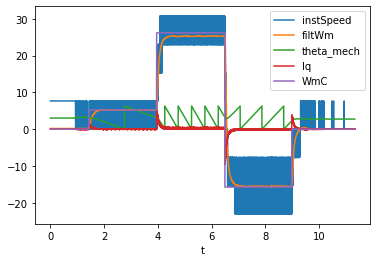

In [199]:
#data = logger.dump()
data = logger.dump(file = 'SpeedControl')
#data = logger.dump(log_vars = 'instSpeed filtWm', file = 'MechanicalSpeed') #, comment = 'current sense offset calibration')
#data = logger.dump(log_vars = 'Theta_e', file = 'ElectricalThetaDaxis3.csv')
#data = logger.dump(log_vars = 'theta_mech instSpeed')

data.plot()

# data = logger.load('current_sensor_offset_cal.csv')

In [ ]:
logger.clear_all()
logger.unregister_all()

In [11]:
amdc.disconnect()

NameError: name 'amdc' is not defined

In [76]:
# Compute average
Ia_avg = np.mean(data['Ia'])
Ib_avg = np.mean(data['Ib'])
Ic_avg = np.mean(data['Ic'])

print(f'Ia mean {Ia_avg}')
print(f'Ib mean {Ib_avg}')
print(f'Ic mean {Ic_avg}')

Ia mean 1.312815975921891
Ib mean 1.3138024320275072
Ic mean 1.3154745567278867


In [201]:
amdc.disconnect()

In [62]:
Curr_Measured = 1.324
Ia_gain = 1.324/Ia_avg
Ib_gain = 1.324/Ib_avg
Ic_gain = 1.324/Ic_avg
print(f'Ia gain {Ia_gain}')
print(f'Ib gain {Ib_gain}')
print(f'Ic gain {Ic_gain}')

Ia gain 9.948991219967057
Ib gain 9.976913395045305
Ic gain 10.166327939587392


In [75]:
logger.info()

	> log info
###################   AMDC LOGGER INFO   ###################

Variable Name:      Index:         Type:         Sample Rate [Hz]:    Number of Samples:
LOG_Theta_e           0            double              1000.0               6216     



In [137]:
max(data.Theta_e)

65534.0

In [114]:
data

,Theta_e
t,
0.000,16266.0
0.001,16266.0
0.002,16266.0
0.003,16266.0
0.004,16266.0
...,...
6.198,11981.0
6.199,11978.0
6.200,11976.0
